# Mines Nancy - Fall 2024 - Numerical Optimization
----
## TP2: descent methods for unconstrained optimization problems
### Part 1: gradient descent methods

In this notebook, we will explore first-order descent methods -- namely **gradient descent** to solve (unconstrained) optimization problems. The goals are:  
- to write your own gradient descent algorithm;
- investigate different step-size strategies (fixed size, optimal, and backtracking)
- compute convergence metrics to monitor the progress of the algorithm -- and deciding when to stop

Just like in TP1, practical implementation of the algorithms relies on classical Python libraries:
1. **NumPy**: For efficient numerical computations, matrix operations, and solving least-squares problems using built-in linear algebra functions.
2. **Matplotlib**: For visualizing the data and displaying / interpreting results.
3. **Scipy**: a NumPy-based python library for scientific computations. In particular, we we'll use some functions from ``scipy.optimize``.

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib` and ``scipy``.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## First example: a quadratic function

Consider the following optimization problem
$$ \min_{\mathbf{x}\in \mathbb{R}^2} f(\mathbf{x})$$
where
$$f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} - \mathbf{p}^\top \mathbf{x} \text{ with } \begin{cases} \mathbf{Q} = \begin{bmatrix} 1 & 0 \\ 0 & \eta\end{bmatrix}, \: \eta > 0\\
\mathbf{p} = \begin{bmatrix} 1\\1\end{bmatrix}\end{cases}$$

**Preliminary questions**
1. Recall the expression of $\nabla f(\mathbf{x})$.
2. What is a minimizer of this optimization problem? Is it unique?
3. Recall the principle of gradient descent using pseudo-code.

> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$, for $\eta = 5$.
2. Display the objective function on the grid $[-1, 1] \times [-1, 1]$, with, say 100 points on each axis. (check the functions ``np.meshgrid``, ``plt.pcolormesh``, ``plt.contour``, ``plt.contourf``). Comment the different graphical representations.
3. Gradient descent (*constant step-size*)
   1. write an algorithm that performs constant step-size gradient descent for a fixed number of iterations from a initial point $\mathbf{x}_0$.
   2. display such iterations on top of the cost function.
   3. propose several metrics to assess the progress (or convergence) of the algorithm as the iterations goes. Display them as a function of iterations (using ``plt.semilogy``)
   4. modify your algorithm to stop whenever one of these metrics goes below a prescribed threshold (fixed in advance).
   5. Using numerical experiments, comment on how to choose a constant step size.
4. Gradient descent (*optimal step-size*)
   1. recall the principle of the optimal stepsize strategy.
   2. adapt the previous algorithm to compute the optimal stepsize at each iteration.
   3. display the evolution of performance metrics along iterations.

5. Compare both strategies in terms of convergence speed and comment. How does the parameter $\eta$ influences algorithmic properties?

In [26]:
# question 1
def f(x1, x2, eta=5):
    return 0.5*(x1**2 + eta*x2**2) - x1 - x2

Text(0, 0.5, '$x_2$')

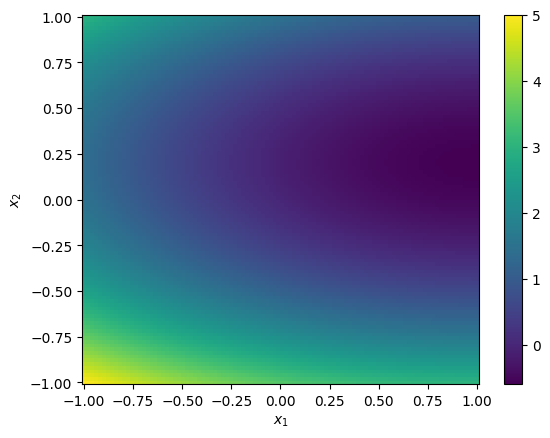

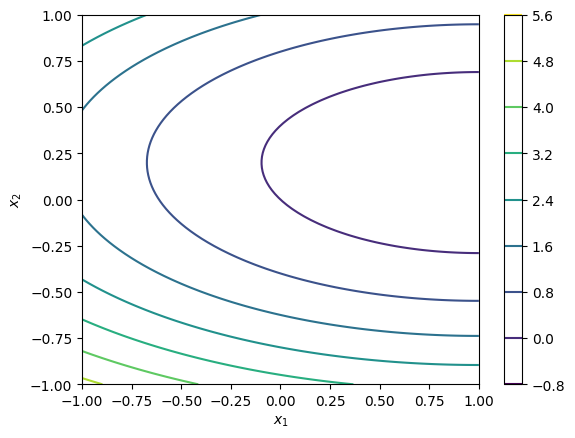

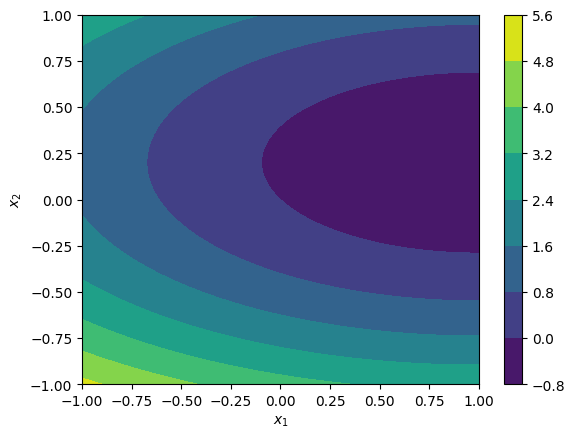

In [27]:
# question 2
N = 100
l1 = np.linspace(-1, 1 , N)
l2 = np.linspace(-1, 1 , N)
x1, x2 = np.meshgrid(l1, l2)

y = f(x1, x2)

plt.figure()
plt.pcolormesh(x1, x2, y)
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.figure()
plt.contour(x1, x2, y)
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.figure()
plt.contourf(x1, x2, y)
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')


In [29]:
# question 3
# Function that compute the gradient
def gradf(x, eta = 5):
  D1 = x[0] -1
  D2 = eta * x[1] -1
  return np.array([D1, D2])

def gradient_descent_fixed_step(x0, alpha, nitermax = 100, tol = 1e-5):
  # list of iterates
  xks = [x0]
  x = x0
  x = x-alpha*gradf(x)


In [ ]:
# question 4

In [ ]:
# question 5

### Second example: a non-quadratic function
Example from Boyd and Vanderberghe.

Consider the optimization problem
$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

In this example, we'll implement the backtracking method seen in class.

**Preliminary questions**
1. Compute the expression of $\nabla f(\mathbf{x})$.
2. Is the problem convex? Comment the existence and uniqueness of solutions to this optimization problem.



> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$.
2. Display the objective function on the grid $[-2, 0.5] \times [-0.5, 0.5]$, with, say 100 points on each axis.
3. Gradient descent (*constant step-size* and *optimal step size*)
   1. Following the quadratic example, write a gradient stepsize algorithm for this problem.
   2. Write a second algorithm with optimal step size selection at each iteration. Do not try to compute the optimal step analytically; rather, look at the function ``scipy.optimize.minimize_scalar`` to compute the step numerically.

4. Gradient descent (*backtracking*)
   1. Recall the principle of backtracking using pseudocode.
   2. For the first gradient descent iteration, implement the backtracking procedure seen in class for arbitrary parameters $(s, \eta)$.
   3. How does the amount of backtracks varies as parameters $(s, \eta)$ are changed?
   4. Incorporate the backtracking strategy in the gradient descent algorithm. Add a counter that tracks the number of backtracks in the algorithm and monitor this information.
5. Compare all three approaches trough selected graphical plots.

In [ ]:
# Question 1

In [ ]:
# Question 2

In [ ]:
# Question 3

In [ ]:
# Question 4

In [ ]:
# Question 5

### Part 2: second-order descent methods

Consider again the second optimization problem, i.e.,

$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

**Preliminary questions**
1. compute the Hessian of $f$
2. using pseudo-code, recall the principle of Newton methods and quasi-Newton methods.


> write here your answers using markdown.

**Programming questions**
1. Implement Newton's method for this problem.
2. Implement the BFGS algorithm for this problem. For the first iteration, use $B_0 = \nabla^2 f(x^{(0)})$ to initialize the method.
3. Compare gradient descent, Newton's algorithm and BFGS through numerical experiments. Evaluate convergence speed, numerical complexity and timings.

In [ ]:
# Question 1

In [ ]:
# Question 2

In [ ]:
# Question 3